# Optimal Transport Tutorial

The core one liner idea is to tranform one distribution to another. A python library is available for quick start.

For installation use 

conda install -c conda-forge pot



# Reference

N. Courty, R. Flamary, D. Tuia, A. Rakotomamonjy, "Optimal transport for domain adaptation", Pattern Analysis and Machine Intelligence, IEEE Transactions on , 2016



# Material and data in this tutorial is adapted from 

https://github.com/rflamary/OTML_DS3_2018/blob/master/1_DomainAdaptation.ipynb
with Optimal transport tutorial by  Rémi Flamary, Nicolas Courty

# Domain Adaptation

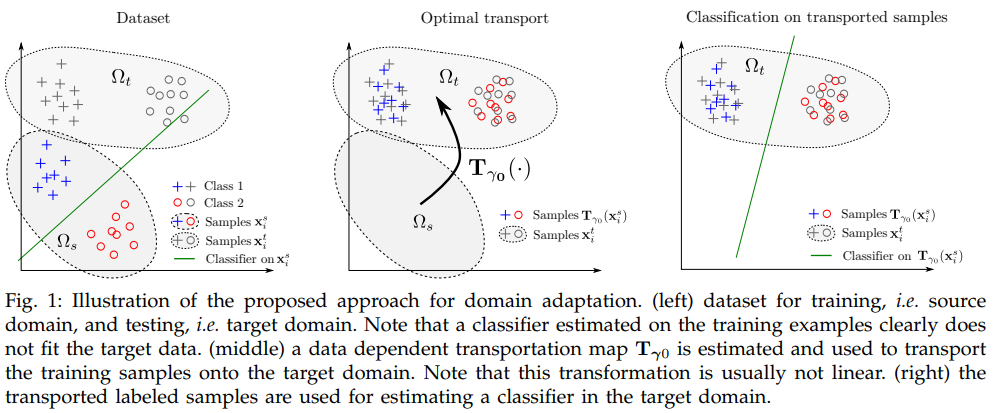

In [26]:
from IPython.display import Image
Image("Pic_1.png")

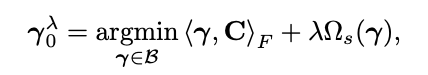

In [27]:
# The problem is formulated as 

Image("Pic_2.png")

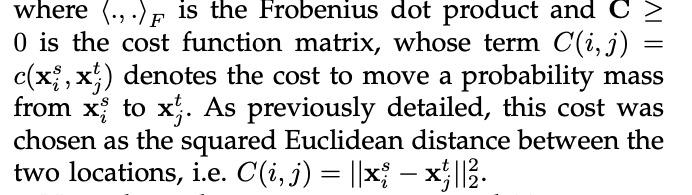

In [28]:
Image("Pic_3.png")

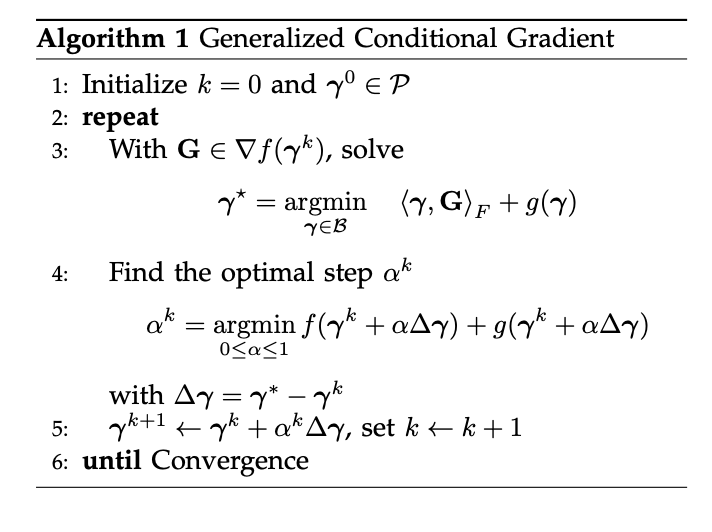

In [29]:
Image("Pic_4.png")

In [1]:
import numpy as np # always need it
import pylab as pl # do the plots


# Plotting detailss
from scipy import linalg
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import glob
import seaborn as sns
import os




from sklearn.svm import SVC
from sklearn.manifold import TSNE
import ot
import ot.plot

In [2]:
def plot_Reg(Ar_R, Ar, f_1, f_2, f_3, ylim, Labels):
    # Histogram of MD without Rare event    
    sns.set(color_codes=True)
    #Will plot the histogram with KDE
    sns.distplot(Ar_R, label = Labels[0], color = 'blue', kde = False, norm_hist = True);
    plt.legend()
    plt.title("MD Distribution")
    plt.ylim(ylim[0])
    plt.savefig(f_1)
    plt.show()

    # Histogram of MD with Rare event   
    sns.set(color_codes=True)
    # Will plot the histogram with KDE
    sns.distplot(Ar, label = Labels[1], color = 'red', kde = False, norm_hist = True);
    plt.legend()
    plt.title("MD Distribution")
    plt.ylim(ylim[1])
    plt.savefig(f_2)
    plt.show()

    # Histogram of MD with comparison 
    sns.set(color_codes=True)
    #Will plot the histogram with KDE
    sns.distplot(Ar_R, label = Labels[0], color = 'blue', kde = False, norm_hist = True);
    sns.distplot(Ar, label   = Labels[1], color = 'red', kde = False, norm_hist = True);
    plt.title("MD Distribution")
    plt.ylim(ylim[2])
    plt.legend()
    plt.savefig(f_3)
    plt.show()

In [3]:
from sklearn import preprocessing
def MD_calculation(ref_data, test_data):
    scalar        =  preprocessing.StandardScaler(with_mean = True, with_std = True).fit(ref_data)
    N_scaled      =  scalar.transform(ref_data)
    T_scaled      =  scalar.transform(test_data)
    mean_normal = np.mean(N_scaled, axis = 0)
    Correlation_Matrix = np.corrcoef(N_scaled.T)
    Correlation_Matrix = Correlation_Matrix+0.0001*np.eye(Correlation_Matrix.shape[1])
    e  = (T_scaled - mean_normal)
    e1 = (N_scaled - mean_normal)
    p = np.linalg.pinv(Correlation_Matrix)
    return  np.sqrt(np.sum(np.dot(e1,p) * e1, axis = 1)), np.sqrt(np.sum(np.dot(e,p) * e, axis = 1))

# First, we will try to see the effect of optimal transport on some simple data-set

In [4]:
n_samples_source = 150
n_samples_target = 150


# Import the data
Xs, ys = ot.datasets.make_data_classif('3gauss', n_samples_source)
Xt, yt = ot.datasets.make_data_classif('3gauss2', n_samples_target)

# Plot the two dataset

Text(0.5, 1.0, 'Target samples')

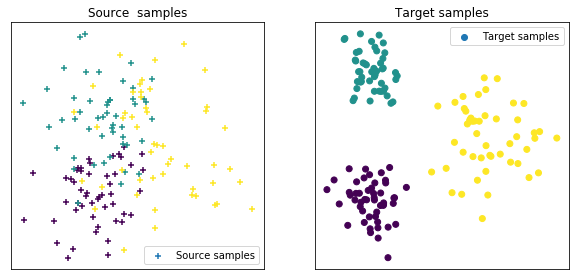

In [5]:
pl.figure(1, figsize=(10, 10))
pl.subplot(2, 2, 1)
pl.scatter(Xs[:, 0], Xs[:, 1], c=ys, marker='+', label='Source samples')
pl.xticks([])
pl.yticks([])
pl.legend(loc=0)
pl.title('Source  samples')

pl.subplot(2, 2, 2)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o', label='Target samples')
pl.xticks([])
pl.yticks([])
pl.legend(loc=0)
pl.title('Target samples')


# Different Algorithms of performing optimal transport are available.

Use them one by one

# EMD

Text(0.5, 1.0, 'Main coupling coefficients\nEMDTransport')

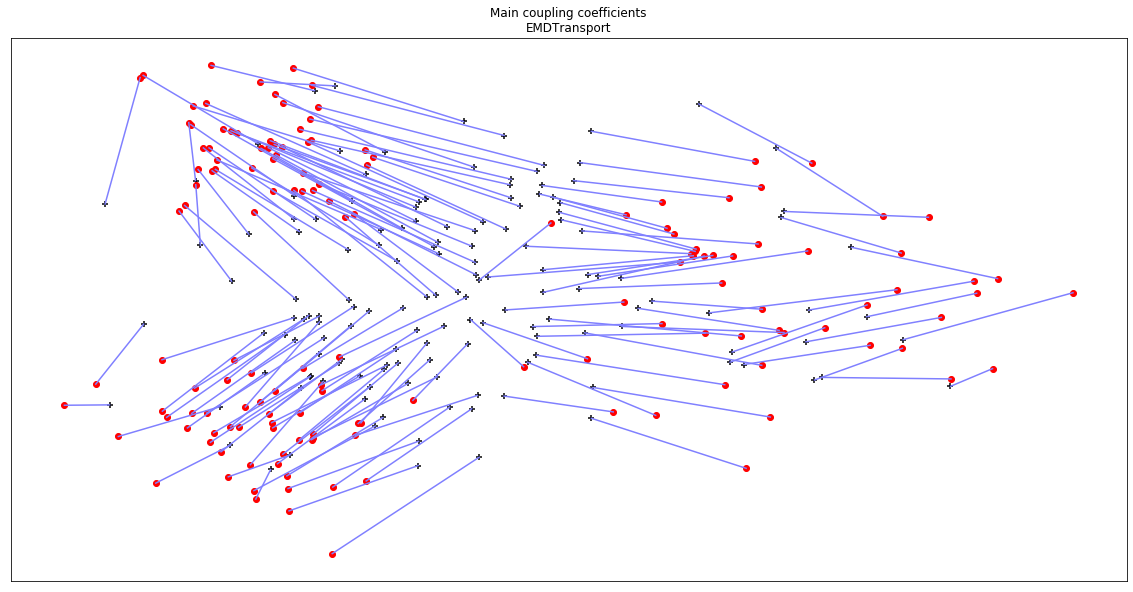

In [23]:
# EMD Transport
ot_emd = ot.da.EMDTransport()
ot_emd.fit(Xs=Xs, Xt=Xt)
transp_Xs_emd = ot_emd.transform(Xs=Xs)

pl.figure(1,(20,10))
ot.plot.plot2D_samples_mat(Xs, Xt, ot_emd.coupling_, c=[.5, .5, 1])
pl.scatter(Xs[:, 0], Xs[:, 1], c='black', marker='+', label='Source samples')
pl.scatter(transp_Xs_emd[:, 0], transp_Xs_emd[:, 1], c='red', marker='o', label='Target samples')
pl.xticks([])
pl.yticks([])
pl.title('Main coupling coefficients\nEMDTransport')

# Sinkhorn Transport

Text(0.5, 1.0, 'Main coupling coefficients\nSinkhornTransport')

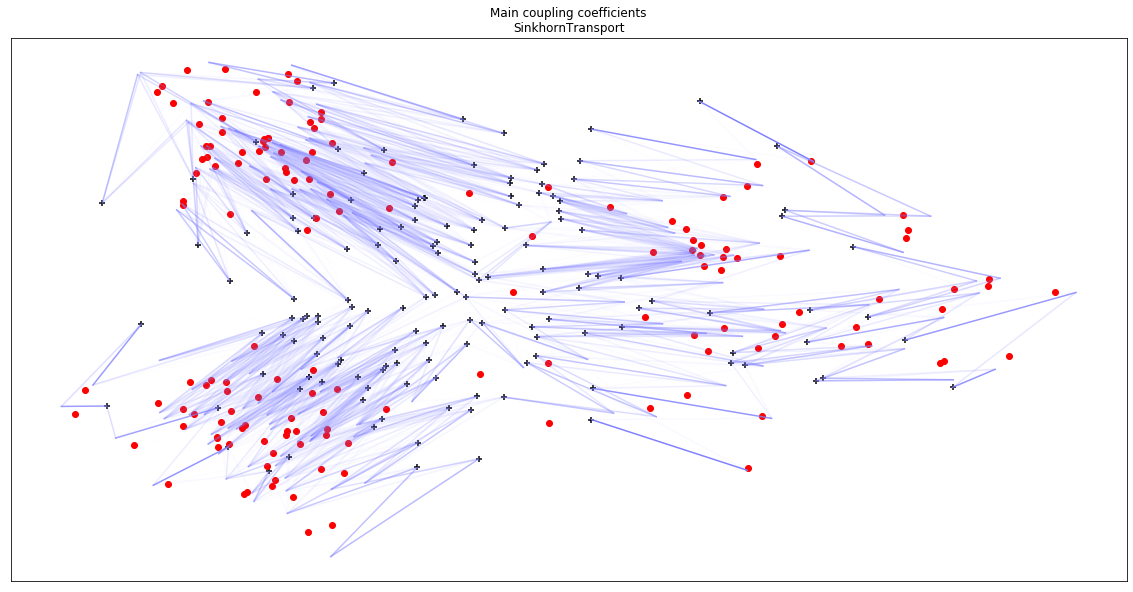

In [25]:
# ot_sinkhorn = ot.da.SinkhornTransport(reg_e=1e-1)
# ot_sinkhorn.fit(Xs=Xs, Xt=Xt)
# transp_Xs_sinkhorn = ot_sinkhorn.transform(Xs=Xs)

pl.figure(1, figsize=(20,10 ))
ot.plot.plot2D_samples_mat(Xs, Xt, ot_sinkhorn.coupling_, c=[.5, .5, 1])
pl.scatter(Xs[:, 0], Xs[:, 1], c='black', marker='+', label='Source samples')
pl.scatter(transp_Xs_sinkhorn[:, 0], transp_Xs_sinkhorn[:, 1], c='red', marker='o', label='Target samples')
pl.xticks([])
pl.yticks([])
pl.title('Main coupling coefficients\nSinkhornTransport')

# Sinkhorn with Group Lasso Regularization

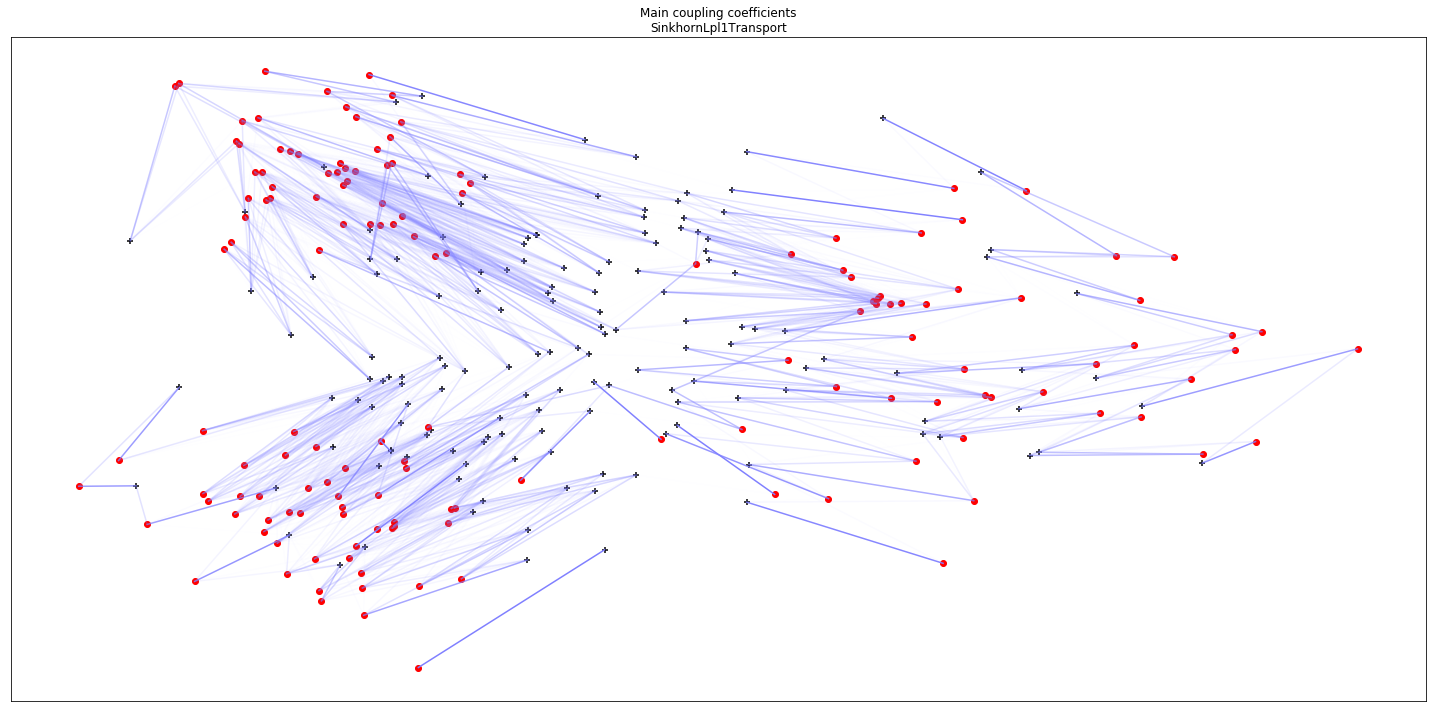

In [30]:
# Sinkhorn Transport with Group lasso regularization
ot_lpl1 = ot.da.SinkhornLpl1Transport(reg_e=1e-1, reg_cl=1e0)
ot_lpl1.fit(Xs=Xs, ys=ys, Xt=Xt)

# transport source samples onto target samples
transp_Xs_lpl1 = ot_lpl1.transform(Xs=Xs)


pl.figure(1, figsize=(20,10 ))
ot.plot.plot2D_samples_mat(Xs, Xt, ot_lpl1.coupling_, c=[.5, .5, 1])
pl.scatter(Xs[:, 0], Xs[:, 1], c='black', marker='+', label='Source samples')
pl.scatter(Xt[:, 0], Xt[:, 1], c='red', marker='o', label='Target samples')
pl.xticks([])
pl.yticks([])
pl.title('Main coupling coefficients\nSinkhornLpl1Transport')
pl.tight_layout()

# Plot the source and the target distribution

Superimpose the transported samples on the original ones (super impose the transported source on the target distribution)

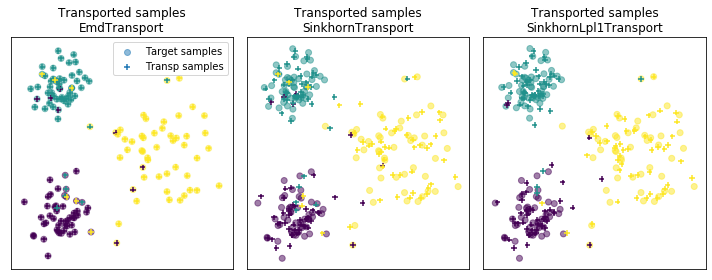

In [48]:
# display transported samples
pl.figure(4, figsize=(10, 4))
pl.subplot(1, 3, 1)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.5)
pl.scatter(transp_Xs_emd[:, 0], transp_Xs_emd[:, 1], c=ys,
           marker='+', label='Transp samples', s=30)
pl.title('Transported samples\nEmdTransport')
pl.legend(loc=0)
pl.xticks([])
pl.yticks([])

pl.subplot(1, 3, 2)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.5)
pl.scatter(transp_Xs_sinkhorn[:, 0], transp_Xs_sinkhorn[:, 1], c=ys,
           marker='+', label='Transp samples', s=30)
pl.title('Transported samples\nSinkhornTransport')
pl.xticks([])
pl.yticks([])

pl.subplot(1, 3, 3)
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.5)
pl.scatter(transp_Xs_lpl1[:, 0], transp_Xs_lpl1[:, 1], c=ys,
           marker='+', label='Transp samples', s=30)
pl.title('Transported samples\nSinkhornLpl1Transport')
pl.xticks([])
pl.yticks([])

pl.tight_layout()
pl.show()

# Apply OT to a more complicated data-set.

Lets do the same thing with a little more complicated data-set, preferable the MNIST data-set.

First, we will load the USPS and the MNIST dataset

# Load the source and the target data

In [18]:
data=np.load('data/mnist_usps.npz')

# import the data
x_source, y_source=data['xs'],data['ys']
x_target, y_target=data['xt'],data['yt']

# normalization
x_source = x_source/x_source.sum(1,keepdims=True) 
x_target = x_target/x_target.sum(1,keepdims=True)

row_source = x_source.shape[0]
row_target = x_target.shape[0]

In [4]:
print(row_data, row_ta)

1000 1000


# Now, Visualize the MNIST and the USPS data-set

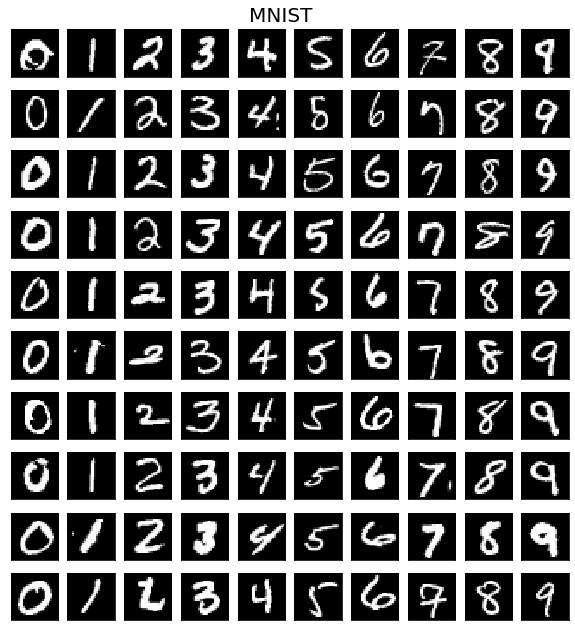

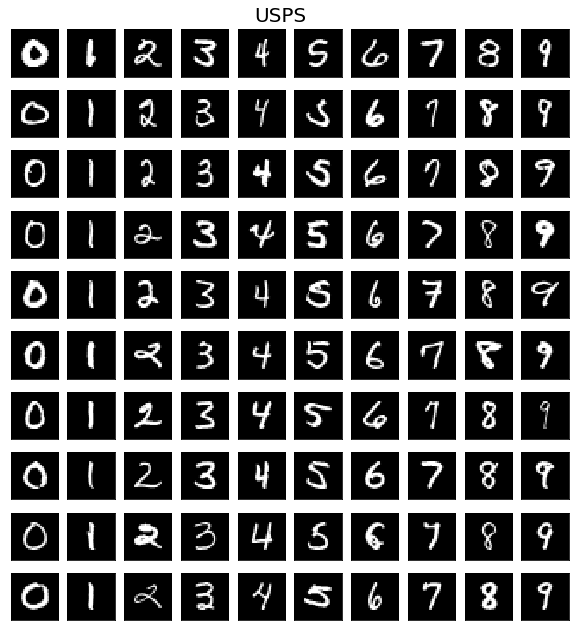

In [20]:

from sklearn.svm import SVC
from sklearn.manifold import TSNE

# function for plotting images
def plot_image(x):
    pl.imshow(x.reshape((28,28)),cmap='gray')
    pl.xticks(())
    pl.yticks(())


nb=10
# First we plot MNIST
pl.figure(1,(nb,nb))
for i in range(nb*nb):
    pl.subplot(nb,nb,1+i)
    c=i%nb
    plot_image(x_source[np.where(y_source==c)[0][i//nb],:])
pl.gcf().suptitle("MNIST", fontsize=20);
pl.gcf().subplots_adjust(top=0.95)
    
# Then we plot USPS
pl.figure(2,(nb,nb))
for i in range(nb*nb):
    pl.subplot(nb,nb,1+i)
    c=i%nb
    plot_image(x_target[np.where(y_target==c)[0][i//nb],:])
pl.gcf().suptitle("USPS", fontsize=20);
pl.gcf().subplots_adjust(top=0.95)

# We will try to now classify without any adaptation that is without shifting the domain of the probability distribution

In [22]:
# Train SVM with reg parameter C=1 and RBF kernel parameter gamma=1e1
clf=SVC(C=1,gamma=1e2) # might take time
clf.fit(x_source,y_source)

# Compute accuracy
ACC_MNIST=clf.score(x_source,y_source) # beware of overfitting !
ACC_USPS=clf.score(x_target,y_target)

print('ACC_MNIST={:1.3f}'.format(ACC_MNIST))
print('ACC_USPS={:1.3f}'.format(ACC_USPS))

ACC_MNIST=0.978
ACC_USPS=0.687


# TSNE for both the domains.

In [23]:
x=np.concatenate((x_source,x_target),axis=0) # all data
xp=TSNE().fit_transform(x) # this might take a while (30 sec on my laptop)
# separate again but now in 2D
xps=xp[:row_source,:] 
xpt=xp[row_target:,:]

pl.figure(3,(12,10))

pl.scatter(xps[:,0],xps[:,1],c=y_source,marker='o',cmap='tab10',label='Source data')
pl.scatter(xpt[:,0],xpt[:,1],c=y_target,marker='+',cmap='tab10',label='Target data')
pl.legend()
pl.colorbar()
pl.title('TSNE Embedding of the Source/Target data');

# EMD

ACC_MNIST=0.584
ACC_USPS=0.775


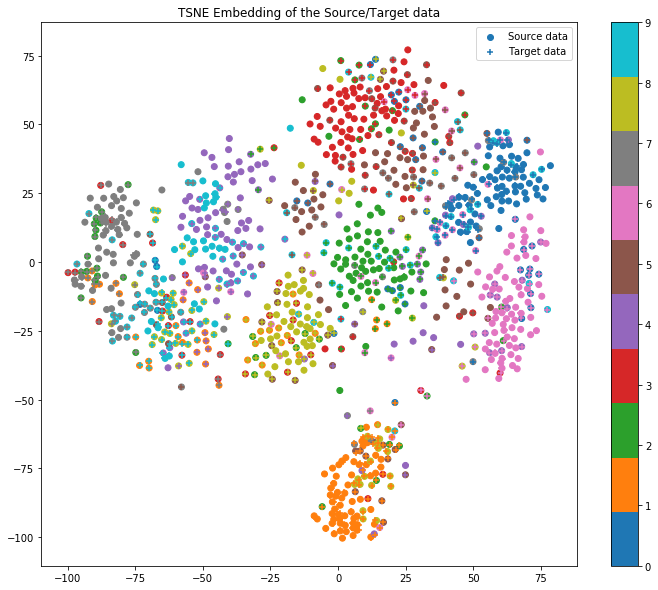

In [30]:
# EMD Transport
ot_emd = ot.da.EMDTransport()
ot_emd.fit(Xs=x_source, Xt=x_target)
transp_Xs_emd = ot_emd.transform(Xs=x_source)

# Train SVM with reg parameter C=1 and RBF kernel parameter gamma=1e1
clf=SVC(C=1,gamma=1e1) # might take time
clf.fit(transp_Xs_emd,y_source)

# Compute accuracy
ACC_MNIST=clf.score(transp_Xs_emd,y_source) # beware of overfitting !
ACC_USPS=clf.score(x_target,y_target)

print('ACC_MNIST={:1.3f}'.format(ACC_MNIST))
print('ACC_USPS={:1.3f}'.format(ACC_USPS))

x=np.concatenate((transp_Xs_emd,x_target),axis=0) # all data
xp=TSNE().fit_transform(x) # this might take a while (30 sec on my laptop)
# separate again but now in 2D
xps=xp[:row_source,:] 
xpt=xp[row_target:,:]

pl.figure(3,(12,10))
pl.scatter(xps[:,0],xps[:,1],c=y_source,marker='o',cmap='tab10',label='Source data')
pl.scatter(xpt[:,0],xpt[:,1],c=y_target,marker='+',cmap='tab10',label='Target data')
pl.legend()
pl.colorbar()
pl.title('TSNE Embedding of the Source/Target data');


We can see that the adaptation with EMD leads to a performance gain of nearly 10%. 
You can get even better performances using entropic regularized OT or group lasso regularization.

# Sinkhorn Transport 

ACC_MNIST=0.368
ACC_USPS=0.407


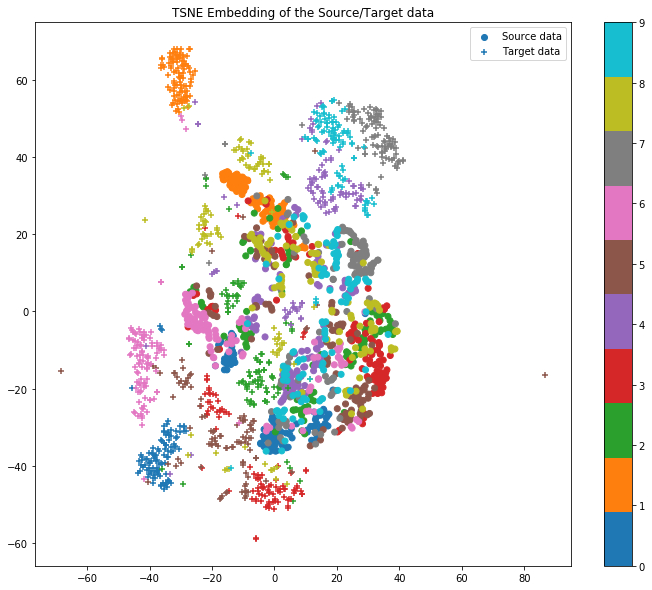

In [31]:

ot_lpl1 = ot.da.SinkhornLpl1Transport(reg_e=1e-1, reg_cl=1e0)
ot_lpl1.fit(Xs=x_source, ys=y_source, Xt=x_target)
transp_Xs_emd = ot_sinkhorn.transform(Xs=x_source)


# Train SVM with reg parameter C=1 and RBF kernel parameter gamma=1e1
clf=SVC(C=1,gamma=1e1) # might take time
clf.fit(transp_Xs_emd,y_source)

# Compute accuracy
ACC_MNIST=clf.score(transp_Xs_emd,y_source) # beware of overfitting !
ACC_USPS=clf.score(x_target,y_target)

print('ACC_MNIST={:1.3f}'.format(ACC_MNIST))
print('ACC_USPS={:1.3f}'.format(ACC_USPS))

x=np.concatenate((transp_Xs_emd,x_target),axis=0) # all data
xp=TSNE().fit_transform(x) # this might take a while (30 sec on my laptop)
# separate again but now in 2D
xps=xp[:row_source,:] 
xpt=xp[row_target:,:]

pl.figure(3,(12,10))
pl.scatter(xps[:,0],xps[:,1],c=y_source,marker='o',cmap='tab10',label='Source data')
pl.scatter(xpt[:,0],xpt[:,1],c=y_target,marker='+',cmap='tab10',label='Target data')
pl.legend()
pl.colorbar()
pl.title('TSNE Embedding of the Source/Target data');

# Sinkhorn with Lasso Regularization 

redo classification/TSNE/Vizu to see the impact of the regularization in term of performances, TNSE and transported samples.

ACC_MNIST=1.000
ACC_USPS=0.731


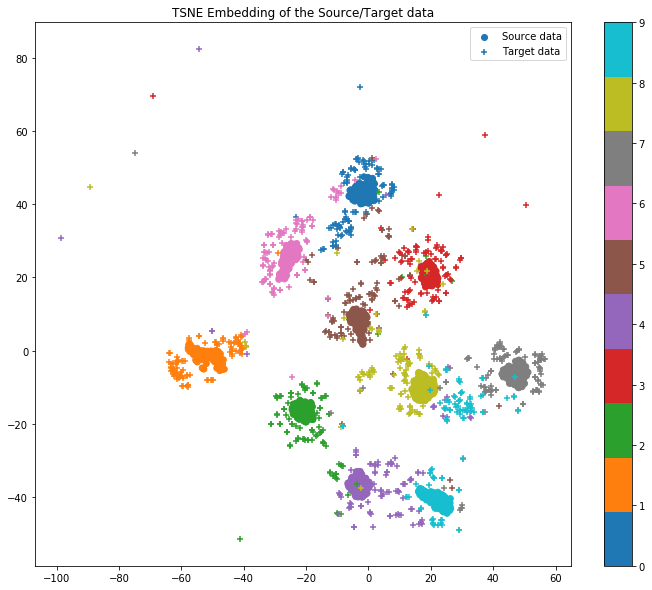

In [32]:
#  Sinkhorn Transport with Group lasso regularization
ot_lpl1 = ot.da.SinkhornLpl1Transport(reg_e=1e-1, reg_cl=1e0)
ot_lpl1.fit(Xs=x_source, ys=y_source, Xt=x_target)
transp_Xs_emd = ot_lpl1.transform(Xs=x_source)

# Train SVM with reg parameter C=1 and RBF kernel parameter gamma=1e1
clf=SVC(C=1,gamma=1e1) # might take time
clf.fit(transp_Xs_emd,y_source)

# Compute accuracy
ACC_MNIST=clf.score(transp_Xs_emd,y_source) # beware of overfitting !
ACC_USPS=clf.score(x_target,y_target)

print('ACC_MNIST={:1.3f}'.format(ACC_MNIST))
print('ACC_USPS={:1.3f}'.format(ACC_USPS))

x=np.concatenate((transp_Xs_emd,x_target),axis=0) # all data
xp=TSNE().fit_transform(x) # this might take a while (30 sec on my laptop)
# separate again but now in 2D
xps=xp[:row_source,:] 
xpt=xp[row_target:,:]

pl.figure(3,(12,10))
pl.scatter(xps[:,0],xps[:,1],c=y_source,marker='o',cmap='tab10',label='Source data')
pl.scatter(xpt[:,0],xpt[:,1],c=y_target,marker='+',cmap='tab10',label='Target data')
pl.legend()
pl.colorbar()
pl.title('TSNE Embedding of the Source/Target data');

### Fusion Dataset

In [31]:
# import Simulated data
import pickle
with (open("../Fusion_data/cut_data.p", "rb")) as openfile:
    while True:
        try:
            x = pickle.load(openfile)
        except EOFError:
            break
print(x.keys())
dataset = x
X_sim = dataset['cut_ref'] 
Y_sim = dataset['cut_test'] 
Test_strip_1 = dataset['strip1'] 
Test_strip_2 = dataset['strip2']
Test_strip_3 = dataset['strip3'] 
Test_strip_4 = dataset['strip4'] 
Test_strip_5 = dataset['strip5'] 
Test_strip_6 = dataset['strip6'] 
Test_strip_7 = dataset['strip7'] 
Test_strip_8 = dataset['strip8'] 
Test_strip_9 = dataset['strip9'] 
Test_strip_10 = dataset['strip10'] 
Test_strip_11 = dataset['strip11']
Test_strip_12 = dataset['strip12']
Test_strip_13 = dataset['strip13'] 
Test_strip_14 = dataset['strip14'] 

dict_keys(['cut_ref', 'cut_test', 'strip1', 'strip2', 'strip3', 'strip4', 'strip5', 'strip6', 'strip7', 'strip8', 'strip9', 'strip10', 'strip11', 'strip12', 'strip13', 'strip14'])


In [2]:
# Import Experimental Data
# THE OLD REFERENCE
import pickle
with (open("../Fusion_data/cut_data_Experimental.p", "rb")) as openfile:
    while True:
        try:
            x = pickle.load(openfile)
        except EOFError:
            break
print(x.keys())
dataset = x
X_exp = dataset['cut_ref'] 
Y_exp = dataset['cut_test'] 


Test_strip_1_exp = dataset['strip1'] 
Test_strip_2_exp = dataset['strip2']
Test_strip_3_exp = dataset['strip3'] 
Test_strip_4_exp = dataset['strip4'] 
Test_strip_5_exp = dataset['strip5'] 
Test_strip_6_exp = dataset['strip6'] 
Test_strip_7_exp = dataset['strip7'] 
Test_strip_8_exp = dataset['strip8'] 
Test_strip_9_exp = dataset['strip9'] 
Test_strip_10_exp = dataset['strip10'] 
Test_strip_11_exp = dataset['strip11']
Test_strip_12_exp = dataset['strip12']

dict_keys(['cut_ref', 'cut_test', 'strip1', 'strip2', 'strip3', 'strip4', 'strip5', 'strip6', 'strip7', 'strip8', 'strip9', 'strip10', 'strip11', 'strip12'])


In [15]:
rand_int = np.random.randint(1, X_sim.shape[0], size = 5000)

In [17]:
import ot
import ot.plot
# Generate some data for printing
Xs = X_sim[rand_int,:]
Xt = X_exp
row_source = Xs.shape[0]
row_target = Xt.shape[0]
ys = np.zeros([row_source, ])
yt = np.ones([row_target,  ])


# Print stuff and check stuff
print(X_exp.shape, Y_exp.shape)
print(row_source, row_target)

(2000, 35) (2356, 35)
5000 2000


In [18]:
print(Xs.shape, Xt.shape)

(5000, 35) (2000, 35)


(2000, 35)


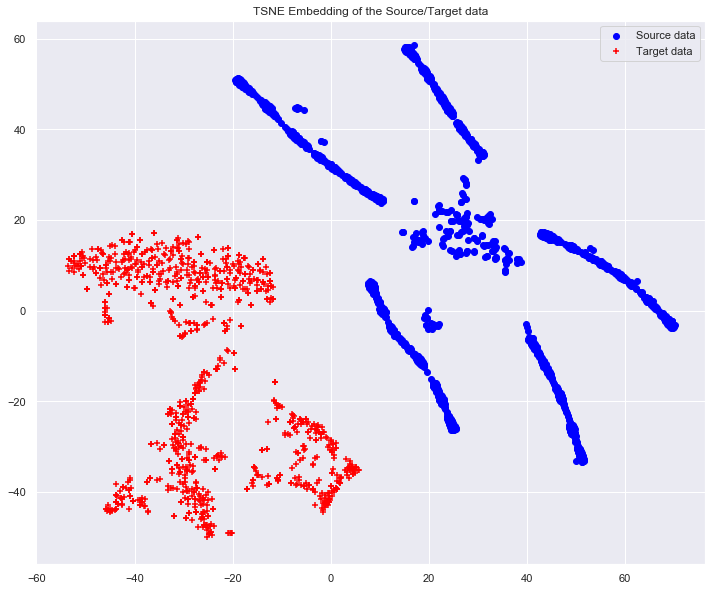

In [37]:
# TSNE before the OT
rt = 1000
rs = 1000
rand_int_t = np.random.randint(1, Xt.shape[0], size = rt)
rand_int_s = np.random.randint(1, Xs.shape[0], size = rs)

x=np.concatenate((Xs[rand_int_s,:], Xt[rand_int_t,:]),axis=0) # all data
print(x.shape)
xp=TSNE().fit_transform(x) # this might take a while (30 sec on my laptop)
# separate again but now in 2D
xps=xp[:rs,:] 
xpt=xp[rt:,:]

pl.figure(3,(12,10))
pl.scatter(xps[:,0],xps[:,1], marker='o',color = 'blue',label='Source data')
pl.scatter(xpt[:,0],xpt[:,1], marker='+',color = 'red',label='Target data')
pl.legend()
pl.title('TSNE Embedding of the Source/Target data');

In [25]:
ot_emd = ot.da.EMDTransport()
ot_emd.fit(Xs=Xs, Xt=Xt)
transp_Xs_emd = ot_emd.transform(Xs=Xs)

/Users/krishnanraghavan/anaconda3/envs/work/lib/python3.7/site-packages/ot/lp/__init__.py:113: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)
/Users/krishnanraghavan/anaconda3/envs/work/lib/python3.7/site-packages/ot/da.py:908: RuntimeWarning: divide by zero encountered in true_divide
  transp = self.coupling_ / np.sum(self.coupling_, 1)[:, None]
/Users/krishnanraghavan/anaconda3/envs/work/lib/python3.7/site-packages/ot/da.py:908: RuntimeWarning: invalid value encountered in true_divide
  transp = self.coupling_ / np.sum(self.coupling_, 1)[:, None]


(2000, 35)


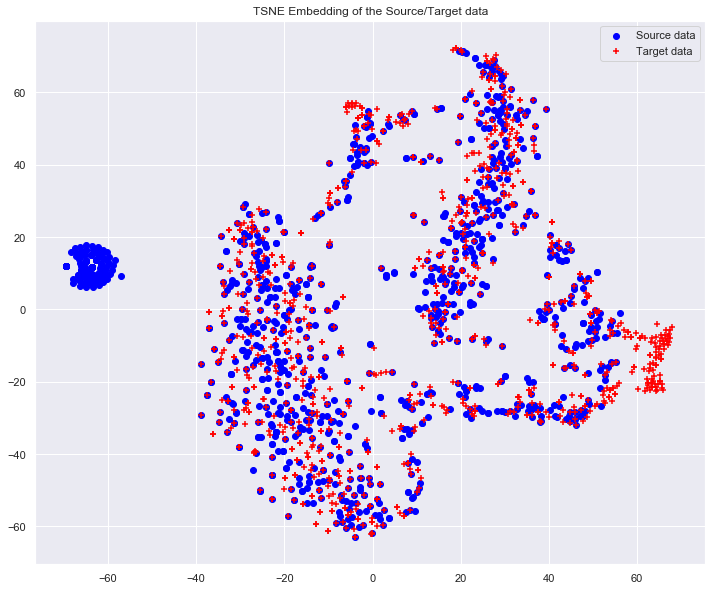

In [38]:
ys = np.zeros([rs,1])
yt = np.zeros([rt,1])
x_OT=np.concatenate((transp_Xs_emd[rand_int_s,:], Xt[rand_int_t,:]),axis=0) # all data

print(x.shape)
xp=TSNE().fit_transform(x_OT) # this might take a while (30 sec on my laptop)
# separate again but now in 2D
xps_OT=xp[:rs,:] 
xpt_OT=xp[rt:,:]

pl.figure(3,(12,10))
pl.scatter(xps_OT[:,0],xps_OT[:,1], marker='o',color = 'blue',label='Source data')
pl.scatter(xpt_OT[:,0],xpt_OT[:,1], marker='+',color = 'red',label='Target data')
pl.legend()
pl.title('TSNE Embedding of the Source/Target data');